# Implement Regression as Classification problem

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
dataset = pd.read_csv("/content/height_category.csv")
dataset

,height,category
0,175.0,1
1,168.6,0
2,176.5,1
3,185.2,1
4,167.7,0
...,...,...
995,167.2,0
996,188.0,1
997,176.4,1
998,164.3,0


In [ ]:
# Separate the columns into y (height) and x (category)
x = dataset.iloc[:, [0]]
y = dataset.iloc[:, [1]]

Text(0.5, 1.0, 'Height vs Category Scatter Plot')

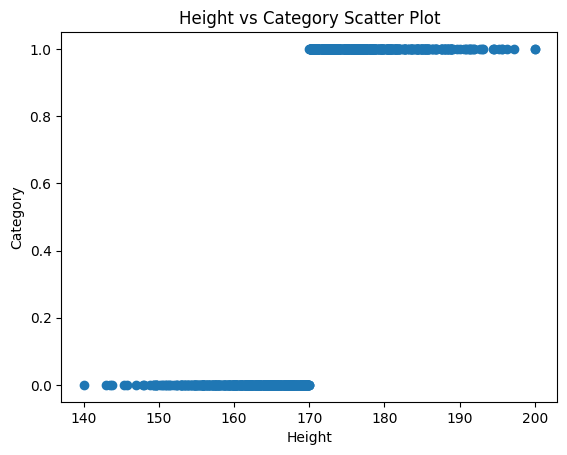

In [ ]:
# Plot the scatter plot
plt.scatter(x,y)
plt.xlabel('Height')
plt.ylabel('Category')
plt.title("Height vs Category Scatter Plot")

In [ ]:
# Linear regression
def hypothesis(theta_array,x):
  return theta_array[0] + theta_array[1] * x

def cost_function(theta_array,x,y,m):
  errors = 0
  for i in range(m):
    errors = errors + ((theta_array[0] + theta_array[1] * x[i]) - y[i]) ** 2
  return errors / (2*m)


# Gradient Descent Approach
def gradient_descent(theta_array,x,y,m,alpha):
  summation_0 = 0
  summation_1 = 0
  for i in range(m):
    summation_0 = summation_0 + (theta_array[0] + theta_array[1] * x[i]) - y[i]
    summation_1 = summation_1 + ((theta_array[0] + theta_array[1] * x[i]) - y[i]) * x[i]

  new_theta0 = theta_array[0] - (alpha/m) * summation_0
  new_theta1 = theta_array[1] - (alpha/m) * summation_1
  updated_new_theta = [new_theta0,new_theta1]
  return updated_new_theta


# Training function
def training(x,y,alpha,iterations):
  theta0 = 0
  theta1 = 0
  theta_array = [theta0,theta1]
  m = x.size
  cost_values = []

  for i in range(iterations):
    theta_array = gradient_descent(theta_array,x,y,m,alpha)
    cost_values.append(cost_function(theta_array,x,y,m))
    y_predict = hypothesis(theta_array, x)
    plt.plot(y_predict,x,'r')
    plt.scatter(y,x)
    plt.xlabel("Height (cm)")
    plt.ylabel("Category (0 = short, 1 = tall)")
    plt.show()

  return cost_values, theta_array

In [ ]:
# Convert our data into numpy arrays
x_value = x.values.reshape(x.size)
y_value = y.values.reshape(y.size)

In [ ]:
# Scale down the height from 0 to 1
x_min, x_max = x_value.min(), x_value.max()
x_value = (x_value - x_min) / (x_max - x_min)

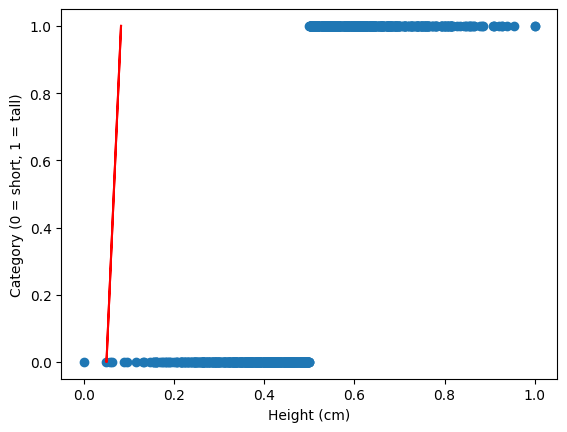

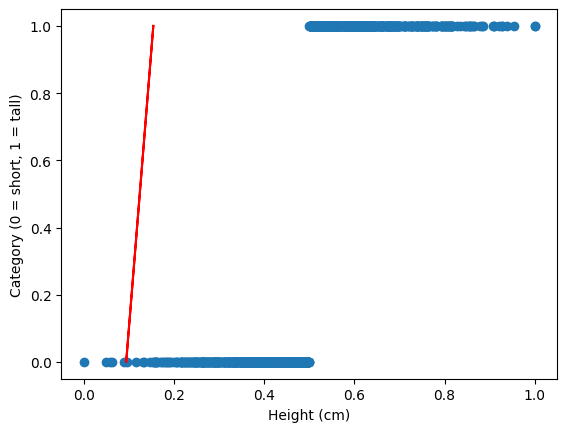

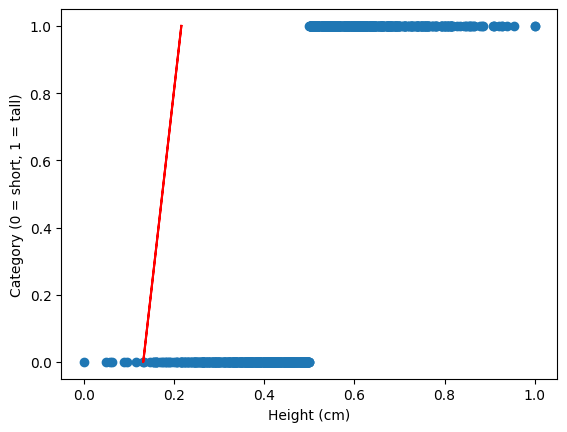

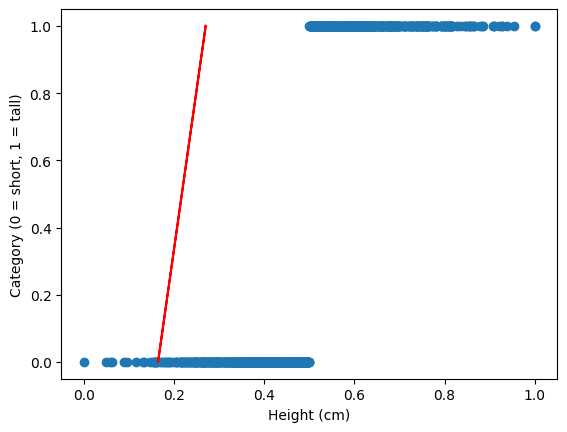

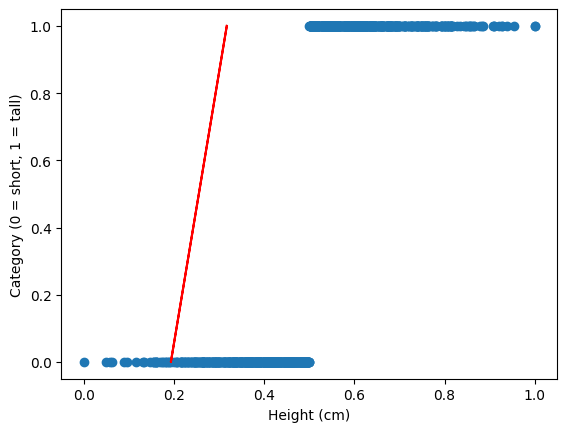

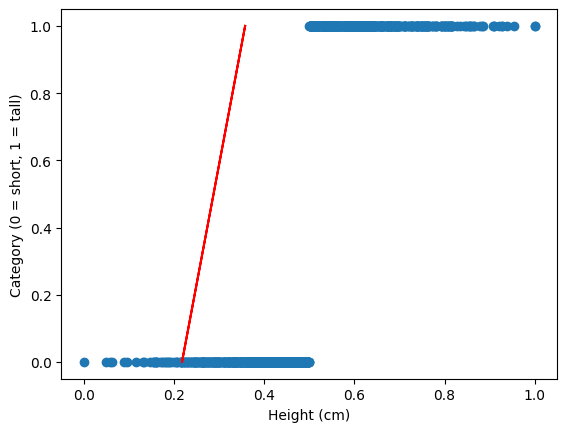

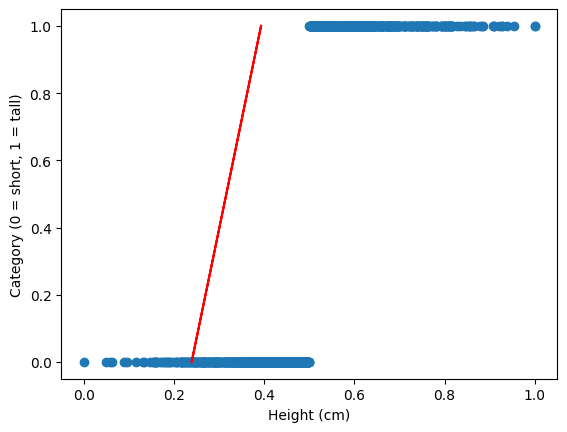

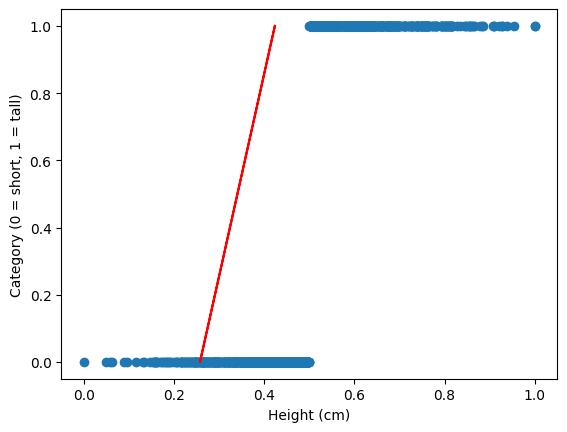

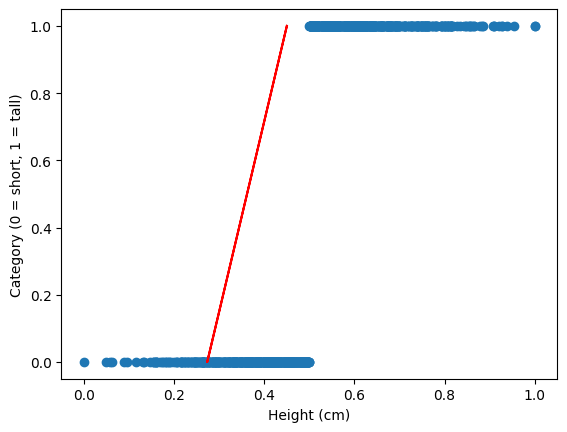

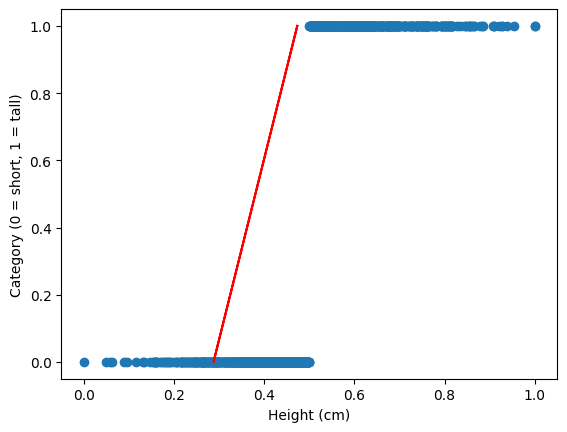

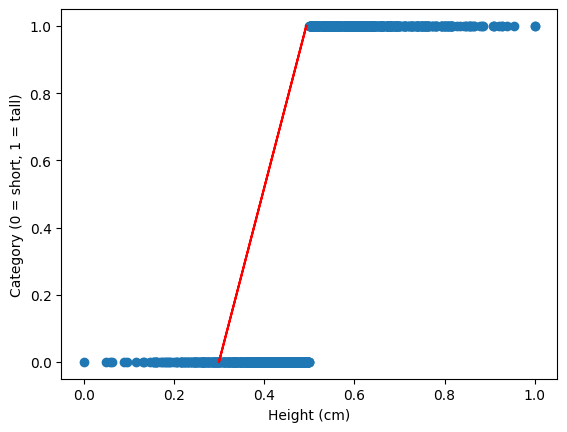

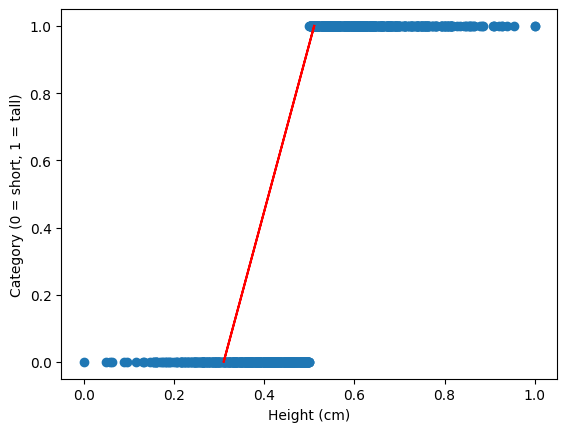

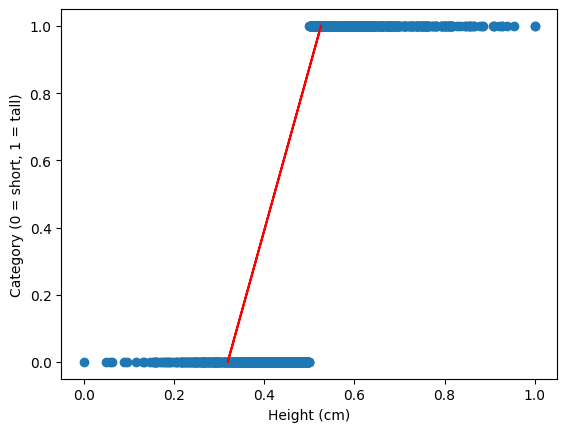

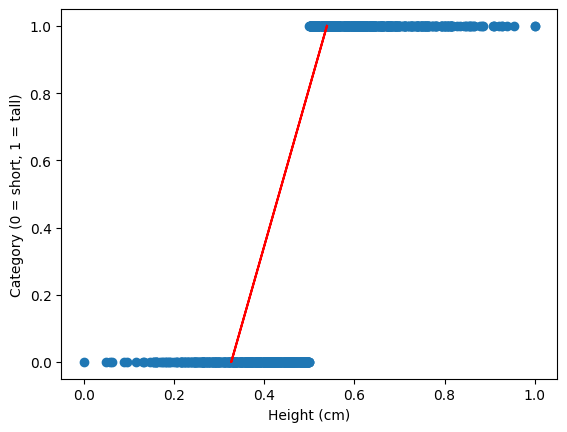

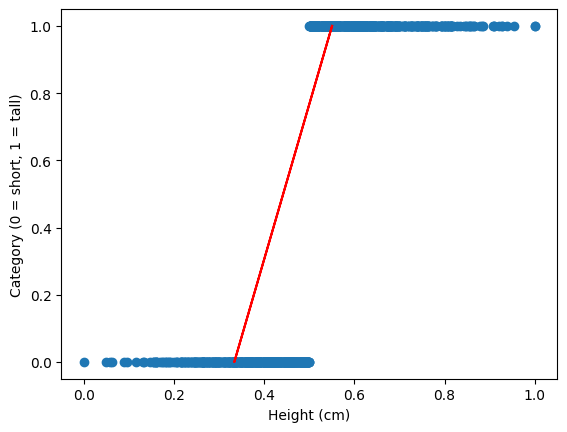

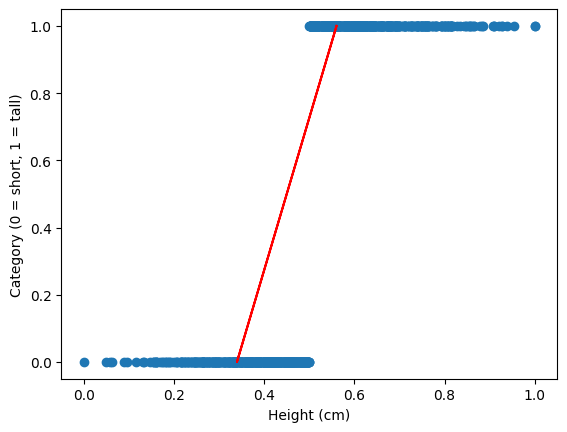

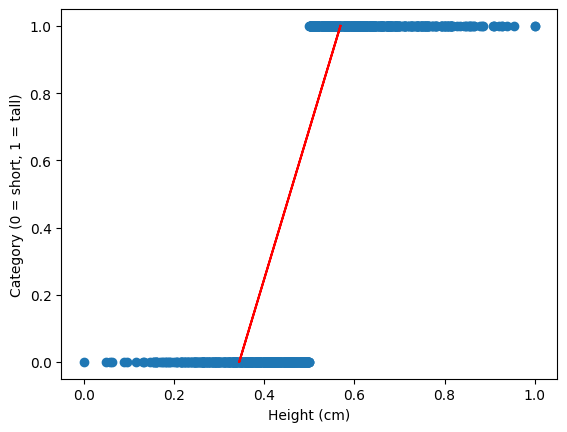

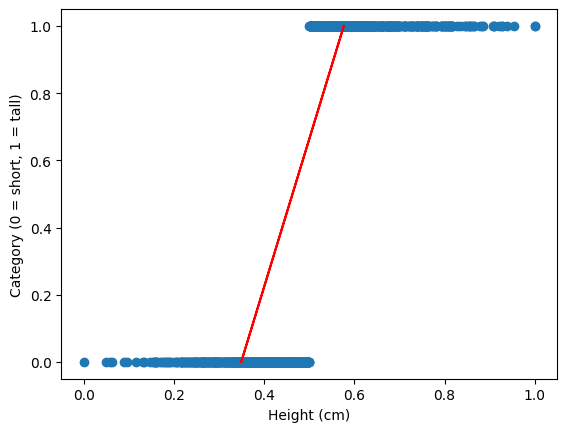

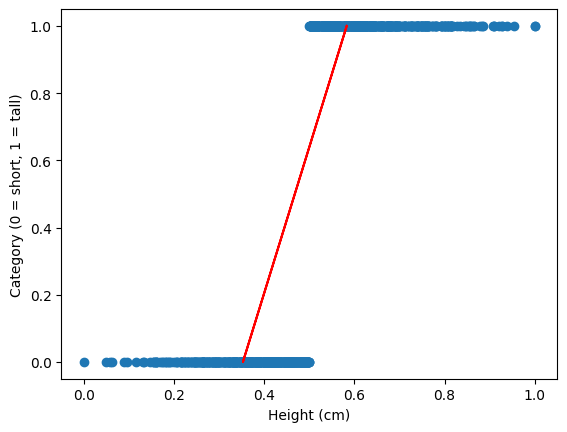

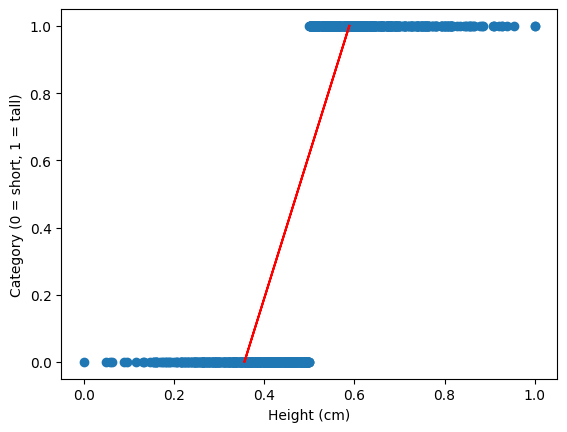

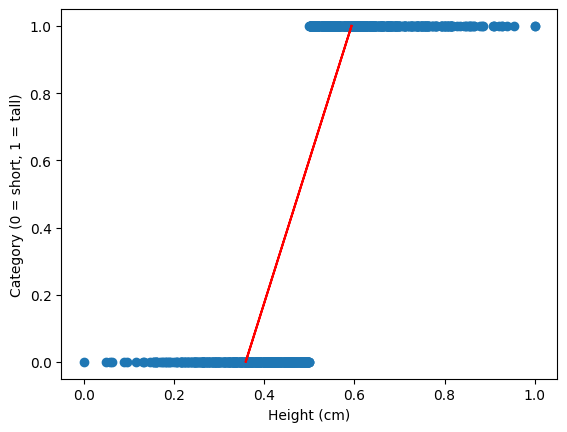

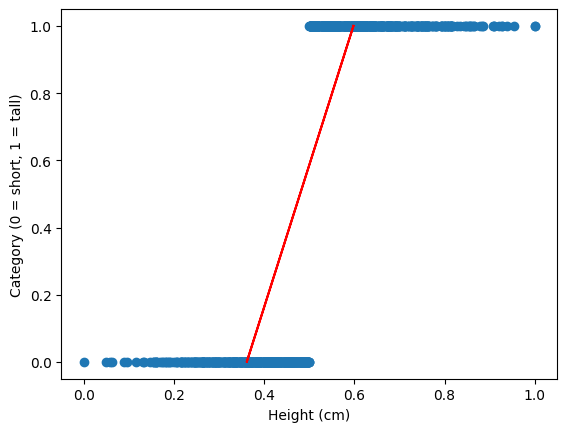

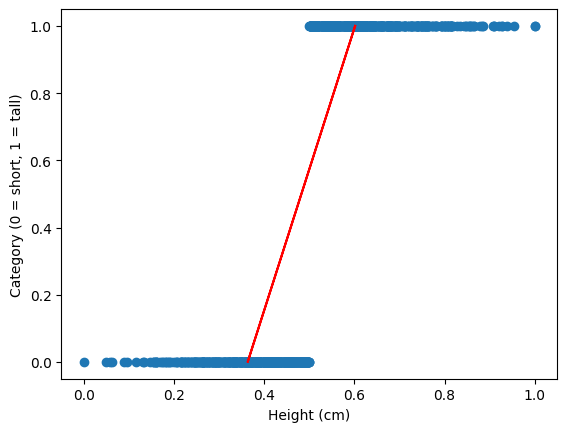

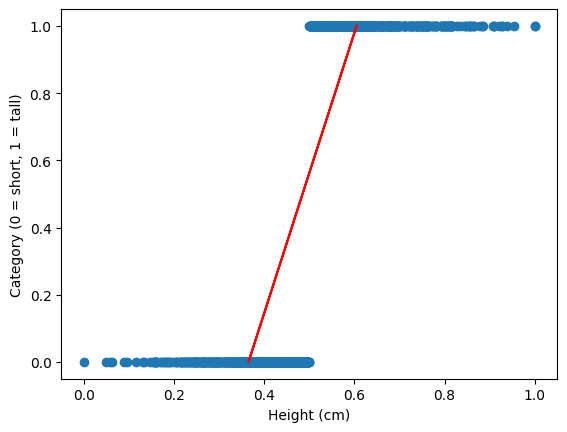

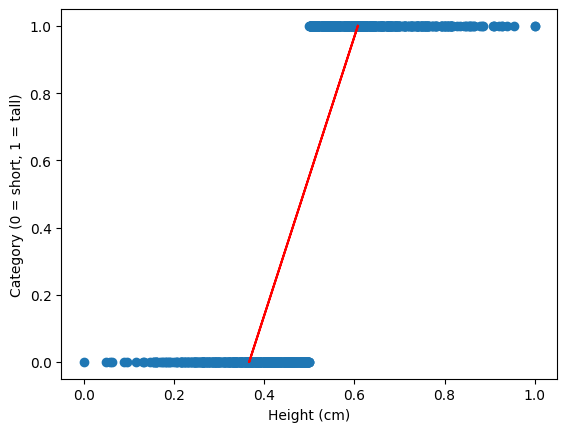

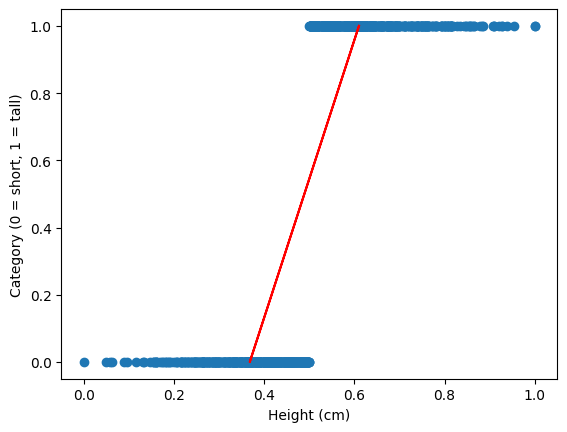

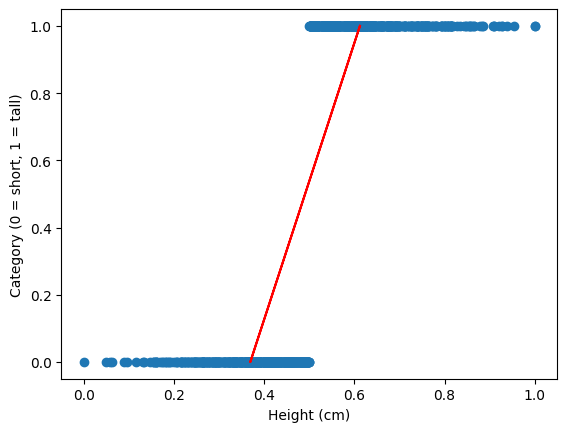

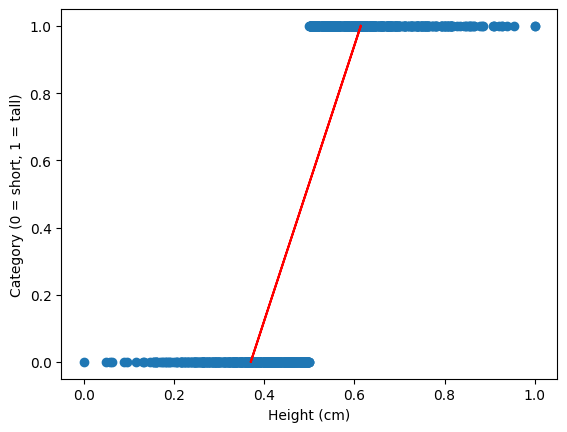

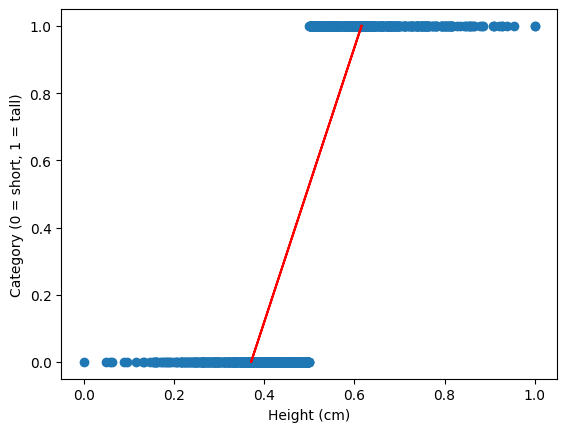

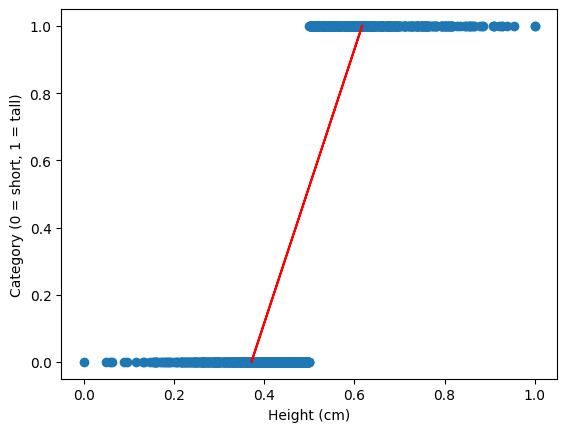

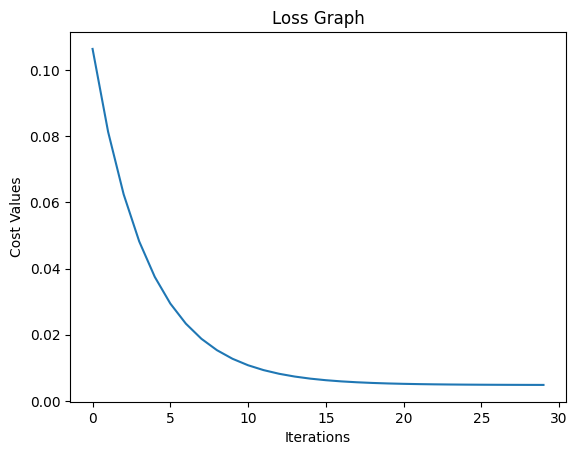

[np.float64(0.37171532335343366), np.float64(0.2455281010535135)]


In [ ]:
# Start the training
alpha = 0.1
iterations = 30
cost_values, theta_array = training(y_value,x_value,alpha,iterations)
x_axis = np.arange(0, len(cost_values), step=1)
plt.plot(x_axis,cost_values)
plt.xlabel("Iterations")
plt.ylabel("Cost Values")
plt.title("Loss Graph")
plt.show()
print(theta_array)

In [ ]:
# Function to get the label
def predict_label(theta_array, x, x_min, x_max, threshold=0.5):
    y = theta_array[0] + theta_array[1] * ((x - x_min) / (x_max - x_min))
    return 1 if y >= threshold else 0

In [ ]:
# Test the model
predict_short = predict_label(theta_array, 165, x_min, x_max)
predict_tall = predict_label(theta_array, 175, x_min, x_max)
print(f"Prediction for 165 cm: {predict_short}")
print(f"Prediction for 175 cm: {predict_tall}")

Prediction for 165 cm: 0
Prediction for 175 cm: 1


In [ ]:
# Maximum value for class 0 (Short): 171.34 cm
predict_label(theta_array, 171.34, x_min, x_max)

0

In [ ]:
# Minimum value for class 1 (Tall): 171.35 cm
predict_label(theta_array, 171.35, x_min, x_max)

1

## What changes should be done in the code of Multi-Variable Linear Regression?

If we are facing Multi-Variable Linear Regression, we should normalize all the variables and then find the threshold value. Since the output depends on multiple variables, the threshold will also vary accordingly.
In the code of Multi-Variable Linear Regression, we already normalize the features, then we need to find the threshold value.